In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import datetime as dt

In [3]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pwd

/Users/Mubarak/Documents/GitHub/DI Project/FirstGen


In [4]:
!ls

311_NYC.csv                         MERGED2003_04_PP.csv
CollegeScorecardDataDictionary.xlsx MERGED2004_05_PP.csv
Crosswalks_20170806                 MERGED2005_06_PP.csv
DI Project - Final-Copy1.ipynb      MERGED2006_07_PP.csv
DI Project - Final.ipynb            MERGED2007_08_PP.csv
DI Project_Old.ipynb                MERGED2008_09_PP.csv
First Plot                          MERGED2009_10_PP.csv
FirstGen - Plot 1.ipynb             MERGED2010_11_PP.csv
FirstGen - Plot 2.ipynb             MERGED2011_12_PP.csv
MERGED1996_97_PP.csv                MERGED2012_13_PP.csv
MERGED1997_98_PP.csv                MERGED2013_14_PP.csv
MERGED1998_99_PP.csv                MERGED2014_15_PP.csv
MERGED1999_00_PP.csv                MERGED2015_16_PP.csv
MERGED2000_01_PP.csv                Untitled.ipynb
MERGED2001_02_PP.csv                firstgen.db
MERGED2002_03_PP.csv                firstgenCOMPLETE.db


In [6]:
!wc -l MERGED1996_97_PP.csv

    6795 MERGED1996_97_PP.csv


In [4]:
connection = sqlite3.connect('firstgen.db')

In [5]:
cursor = connection.cursor()

In [16]:
files = ('MERGED1996_97_PP.csv','MERGED1997_98_PP.csv','MERGED1998_99_PP.csv','MERGED1999_00_PP.csv',
         'MERGED2000_01_PP.csv','MERGED2001_02_PP.csv','MERGED2002_03_PP.csv','MERGED2003_04_PP.csv',
         'MERGED2004_05_PP.csv','MERGED2005_06_PP.csv','MERGED2006_07_PP.csv','MERGED2007_08_PP.csv',
         'MERGED2008_09_PP.csv','MERGED2009_10_PP.csv','MERGED2010_11_PP.csv','MERGED2011_12_PP.csv',
         'MERGED2012_13_PP.csv','MERGED2013_14_PP.csv','MERGED2014_15_PP.csv','MERGED2015_16_PP.csv')
         

In [17]:
for i,x in enumerate(files):  
    start = dt.datetime.now()
    chunksize = 5000
    j = 0

    for df in pd.read_csv(x, chunksize=chunksize):

        df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) # Remove spaces from columns
        j+=1
        
        # Columns to keep
        columns = ['ACCREDAGENCY', 'INSTURL', 'NPCURL', 'HCM2', 'LOCALE', 'LOCALE2',
       'LATITUDE', 'LONGITUDE', 'CCBASIC', 'CCUGPROF', 'CCSIZSET', 'HBCU',
       'PBI', 'ANNHI', 'TRIBAL', 'AANAPII', 'HSI', 'NANTI', 'MENONLY',
       'WOMENONLY', 'RELAFFIL', 'ADM_RATE', 'ADM_RATE_ALL', 'SATVR25',
       'SATVR75', 'SATMT25', 'SATMT75', 'SATWR25', 'SATWR75', 'SATVRMID',
       'SATMTMID', 'SATWRMID', 'ACTCM25', 'ACTCM75', 'ACTEN25', 'ACTEN75',
       'ACTMT25', 'ACTMT75', 'ACTWR25', 'ACTWR75', 'ACTCMMID', 'ACTENMID',
       'ACTMTMID', 'ACTWRMID', 'SAT_AVG', 'SAT_AVG_ALL', 'DISTANCEONLY', 'UG',
       'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN',
       'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_WHITENH', 'UGDS_BLACKNH', 'UGDS_API',
       'UGDS_AIANOLD', 'UGDS_HISPOLD', 'UG_NRA', 'UG_UNKN', 'UG_WHITENH',
       'UG_BLACKNH', 'UG_API', 'UG_AIANOLD', 'UG_HISPOLD', 'PPTUG_EF2',
       'CURROPER', 'NPT4_PUB', 'NPT4_PRIV', 'NPT4_PROG', 'NPT4_OTHER',
       'NPT41_PUB', 'NPT42_PUB', 'NPT43_PUB', 'NPT44_PUB', 'NPT45_PUB',
       'NPT41_PRIV', 'NPT42_PRIV', 'NPT43_PRIV', 'NPT44_PRIV', 'NPT45_PRIV',
       'NPT41_PROG', 'NPT42_PROG', 'NPT43_PROG', 'NPT44_PROG', 'NPT45_PROG',
       'NPT41_OTHER', 'NPT42_OTHER', 'NPT43_OTHER', 'NPT44_OTHER',
       'NPT45_OTHER', 'NPT4_048_PUB', 'NPT4_048_PRIV', 'NPT4_048_PROG',
       'NPT4_048_OTHER', 'NPT4_3075_PUB', 'NPT4_3075_PRIV', 'NPT4_75UP_PUB',
       'NPT4_75UP_PRIV', 'NPT4_3075_PROG', 'NPT4_3075_OTHER', 'NPT4_75UP_PROG',
       'NPT4_75UP_OTHER', 'NUM4_PUB', 'NUM4_PRIV', 'NUM4_PROG', 'NUM4_OTHER',
       'NUM41_PUB', 'NUM42_PUB', 'NUM43_PUB', 'NUM44_PUB', 'NUM45_PUB',
       'NUM41_PRIV', 'NUM42_PRIV', 'NUM43_PRIV', 'NUM44_PRIV', 'NUM45_PRIV',
       'NUM41_PROG', 'NUM42_PROG', 'NUM43_PROG', 'NUM44_PROG', 'NUM45_PROG',
       'NUM41_OTHER', 'NUM42_OTHER', 'NUM43_OTHER', 'NUM44_OTHER',
       'NUM45_OTHER', 'COSTT4_A', 'COSTT4_P', 'TUITIONFEE_IN',
       'TUITIONFEE_OUT', 'TUITIONFEE_PROG', 'AVGFACSAL', 'PFTFAC', 'PCTPELL',
       'C150_4', 'C150_L4', 'C150_4_POOLED', 'C150_L4_POOLED', 'POOLYRS',
       'PFTFTUG1_EF', 'D150_4', 'D150_L4', 'D150_4_POOLED', 'D150_L4_POOLED',
       'C150_4_WHITE', 'C150_4_BLACK', 'C150_4_HISP', 'C150_4_ASIAN',
       'C150_4_AIAN', 'C150_4_NHPI', 'C150_4_2MOR', 'C150_4_NRA',
       'C150_4_UNKN', 'C150_4_WHITENH', 'C150_4_BLACKNH', 'C150_4_API',
       'C150_4_AIANOLD', 'C150_4_HISPOLD', 'C150_L4_WHITE', 'C150_L4_BLACK',
       'C150_L4_HISP', 'C150_L4_ASIAN', 'C150_L4_AIAN', 'C150_L4_NHPI',
       'C150_L4_2MOR', 'C150_L4_NRA', 'C150_L4_UNKN', 'C150_L4_WHITENH',
       'C150_L4_BLACKNH', 'C150_L4_API', 'C150_L4_AIANOLD', 'C150_L4_HISPOLD',
       'C200_4', 'C200_L4', 'D200_4', 'D200_L4', 'RET_FT4', 'RET_FTL4',
       'RET_PT4', 'RET_PTL4', 'C200_4_POOLED', 'C200_L4_POOLED', 'POOLYRS200',
       'D200_4_POOLED', 'D200_L4_POOLED', 'PCTFLOAN', 'UG25ABV', 'CDR3',
       'DEATH_YR6_RT', 'COMP_ORIG_YR6_RT', 'COMP_4YR_TRANS_YR6_RT',
       'COMP_2YR_TRANS_YR6_RT', 'WDRAW_ORIG_YR6_RT', 'WDRAW_4YR_TRANS_YR6_RT',
       'WDRAW_2YR_TRANS_YR6_RT', 'ENRL_ORIG_YR6_RT', 'ENRL_4YR_TRANS_YR6_RT',
       'ENRL_2YR_TRANS_YR6_RT', 'UNKN_ORIG_YR6_RT', 'UNKN_4YR_TRANS_YR6_RT',
       'UNKN_2YR_TRANS_YR6_RT', 'LO_INC_DEATH_YR6_RT',
       'LO_INC_COMP_ORIG_YR6_RT', 'LO_INC_COMP_4YR_TRANS_YR6_RT',
       'LO_INC_COMP_2YR_TRANS_YR6_RT', 'LO_INC_WDRAW_ORIG_YR6_RT',
       'LO_INC_WDRAW_4YR_TRANS_YR6_RT', 'LO_INC_WDRAW_2YR_TRANS_YR6_RT',
       'LO_INC_ENRL_ORIG_YR6_RT', 'LO_INC_ENRL_4YR_TRANS_YR6_RT',
       'LO_INC_ENRL_2YR_TRANS_YR6_RT', 'LO_INC_UNKN_ORIG_YR6_RT',
       'LO_INC_UNKN_4YR_TRANS_YR6_RT', 'LO_INC_UNKN_2YR_TRANS_YR6_RT',
       'MD_INC_DEATH_YR6_RT', 'MD_INC_COMP_ORIG_YR6_RT',
       'MD_INC_COMP_4YR_TRANS_YR6_RT', 'MD_INC_COMP_2YR_TRANS_YR6_RT',
       'MD_INC_WDRAW_ORIG_YR6_RT', 'MD_INC_WDRAW_4YR_TRANS_YR6_RT',
       'MD_INC_WDRAW_2YR_TRANS_YR6_RT', 'MD_INC_ENRL_ORIG_YR6_RT',
       'MD_INC_ENRL_4YR_TRANS_YR6_RT', 'MD_INC_ENRL_2YR_TRANS_YR6_RT',
       'MD_INC_UNKN_ORIG_YR6_RT', 'MD_INC_UNKN_4YR_TRANS_YR6_RT',
       'MD_INC_UNKN_2YR_TRANS_YR6_RT', 'HI_INC_DEATH_YR6_RT',
       'HI_INC_COMP_ORIG_YR6_RT', 'HI_INC_COMP_4YR_TRANS_YR6_RT',
       'HI_INC_COMP_2YR_TRANS_YR6_RT', 'HI_INC_WDRAW_ORIG_YR6_RT',
       'HI_INC_WDRAW_4YR_TRANS_YR6_RT', 'HI_INC_WDRAW_2YR_TRANS_YR6_RT',
       'HI_INC_ENRL_ORIG_YR6_RT', 'HI_INC_ENRL_4YR_TRANS_YR6_RT',
       'HI_INC_ENRL_2YR_TRANS_YR6_RT', 'HI_INC_UNKN_ORIG_YR6_RT',
       'HI_INC_UNKN_4YR_TRANS_YR6_RT', 'HI_INC_UNKN_2YR_TRANS_YR6_RT',
       'DEP_DEATH_YR6_RT', 'DEP_COMP_ORIG_YR6_RT', 'DEP_COMP_4YR_TRANS_YR6_RT',
       'DEP_COMP_2YR_TRANS_YR6_RT', 'DEP_WDRAW_ORIG_YR6_RT',
       'DEP_WDRAW_4YR_TRANS_YR6_RT', 'DEP_WDRAW_2YR_TRANS_YR6_RT',
       'DEP_ENRL_ORIG_YR6_RT', 'DEP_ENRL_4YR_TRANS_YR6_RT',
       'DEP_ENRL_2YR_TRANS_YR6_RT', 'DEP_UNKN_ORIG_YR6_RT',
       'DEP_UNKN_4YR_TRANS_YR6_RT', 'DEP_UNKN_2YR_TRANS_YR6_RT',
       'IND_DEATH_YR6_RT', 'IND_COMP_ORIG_YR6_RT', 'IND_COMP_4YR_TRANS_YR6_RT',
       'IND_COMP_2YR_TRANS_YR6_RT', 'IND_WDRAW_ORIG_YR6_RT',
       'IND_WDRAW_4YR_TRANS_YR6_RT', 'IND_WDRAW_2YR_TRANS_YR6_RT',
       'IND_ENRL_ORIG_YR6_RT', 'IND_ENRL_4YR_TRANS_YR6_RT',
       'IND_ENRL_2YR_TRANS_YR6_RT', 'IND_UNKN_ORIG_YR6_RT',
       'IND_UNKN_4YR_TRANS_YR6_RT', 'IND_UNKN_2YR_TRANS_YR6_RT',
       'FEMALE_DEATH_YR6_RT', 'FEMALE_COMP_ORIG_YR6_RT',
       'FEMALE_COMP_4YR_TRANS_YR6_RT', 'FEMALE_COMP_2YR_TRANS_YR6_RT',
       'FEMALE_WDRAW_ORIG_YR6_RT', 'FEMALE_WDRAW_4YR_TRANS_YR6_RT',
       'FEMALE_WDRAW_2YR_TRANS_YR6_RT', 'FEMALE_ENRL_ORIG_YR6_RT',
       'FEMALE_ENRL_4YR_TRANS_YR6_RT', 'FEMALE_ENRL_2YR_TRANS_YR6_RT',
       'FEMALE_UNKN_ORIG_YR6_RT', 'FEMALE_UNKN_4YR_TRANS_YR6_RT',
       'FEMALE_UNKN_2YR_TRANS_YR6_RT', 'MALE_DEATH_YR6_RT',
       'MALE_COMP_ORIG_YR6_RT', 'MALE_COMP_4YR_TRANS_YR6_RT',
       'MALE_COMP_2YR_TRANS_YR6_RT', 'MALE_WDRAW_ORIG_YR6_RT',
       'MALE_WDRAW_4YR_TRANS_YR6_RT', 'MALE_WDRAW_2YR_TRANS_YR6_RT',
       'MALE_ENRL_ORIG_YR6_RT', 'MALE_ENRL_4YR_TRANS_YR6_RT',
       'MALE_ENRL_2YR_TRANS_YR6_RT', 'MALE_UNKN_ORIG_YR6_RT',
       'MALE_UNKN_4YR_TRANS_YR6_RT', 'MALE_UNKN_2YR_TRANS_YR6_RT',
       'PELL_DEATH_YR6_RT', 'PELL_COMP_ORIG_YR6_RT',
       'PELL_COMP_4YR_TRANS_YR6_RT', 'PELL_COMP_2YR_TRANS_YR6_RT',
       'PELL_WDRAW_ORIG_YR6_RT', 'PELL_WDRAW_4YR_TRANS_YR6_RT',
       'PELL_WDRAW_2YR_TRANS_YR6_RT', 'PELL_ENRL_ORIG_YR6_RT',
       'PELL_ENRL_4YR_TRANS_YR6_RT', 'PELL_ENRL_2YR_TRANS_YR6_RT',
       'PELL_UNKN_ORIG_YR6_RT', 'PELL_UNKN_4YR_TRANS_YR6_RT',
       'PELL_UNKN_2YR_TRANS_YR6_RT', 'NOPELL_DEATH_YR6_RT',
       'NOPELL_COMP_ORIG_YR6_RT', 'NOPELL_COMP_4YR_TRANS_YR6_RT',
       'NOPELL_COMP_2YR_TRANS_YR6_RT', 'NOPELL_WDRAW_ORIG_YR6_RT',
       'NOPELL_WDRAW_4YR_TRANS_YR6_RT', 'NOPELL_WDRAW_2YR_TRANS_YR6_RT',
       'NOPELL_ENRL_ORIG_YR6_RT', 'NOPELL_ENRL_4YR_TRANS_YR6_RT',
       'NOPELL_ENRL_2YR_TRANS_YR6_RT', 'NOPELL_UNKN_ORIG_YR6_RT',
       'NOPELL_UNKN_4YR_TRANS_YR6_RT', 'NOPELL_UNKN_2YR_TRANS_YR6_RT',
       'LOAN_DEATH_YR6_RT', 'LOAN_COMP_ORIG_YR6_RT',
       'LOAN_COMP_4YR_TRANS_YR6_RT', 'LOAN_COMP_2YR_TRANS_YR6_RT',
       'LOAN_WDRAW_ORIG_YR6_RT', 'LOAN_WDRAW_4YR_TRANS_YR6_RT',
       'LOAN_WDRAW_2YR_TRANS_YR6_RT', 'LOAN_ENRL_ORIG_YR6_RT',
       'LOAN_ENRL_4YR_TRANS_YR6_RT', 'LOAN_ENRL_2YR_TRANS_YR6_RT',
       'LOAN_UNKN_ORIG_YR6_RT', 'LOAN_UNKN_4YR_TRANS_YR6_RT',
       'LOAN_UNKN_2YR_TRANS_YR6_RT', 'NOLOAN_DEATH_YR6_RT',
       'NOLOAN_COMP_ORIG_YR6_RT', 'NOLOAN_COMP_4YR_TRANS_YR6_RT',
       'NOLOAN_COMP_2YR_TRANS_YR6_RT', 'NOLOAN_WDRAW_ORIG_YR6_RT',
       'NOLOAN_WDRAW_4YR_TRANS_YR6_RT', 'NOLOAN_WDRAW_2YR_TRANS_YR6_RT',
       'NOLOAN_ENRL_ORIG_YR6_RT', 'NOLOAN_ENRL_4YR_TRANS_YR6_RT',
       'NOLOAN_ENRL_2YR_TRANS_YR6_RT', 'NOLOAN_UNKN_ORIG_YR6_RT',
       'NOLOAN_UNKN_4YR_TRANS_YR6_RT', 'NOLOAN_UNKN_2YR_TRANS_YR6_RT',
       'FIRSTGEN_DEATH_YR6_RT', 'FIRSTGEN_COMP_ORIG_YR6_RT',
       'FIRSTGEN_COMP_4YR_TRANS_YR6_RT', 'FIRSTGEN_COMP_2YR_TRANS_YR6_RT',
       'FIRSTGEN_WDRAW_ORIG_YR6_RT', 'FIRSTGEN_WDRAW_4YR_TRANS_YR6_RT',
       'FIRSTGEN_WDRAW_2YR_TRANS_YR6_RT', 'FIRSTGEN_ENRL_ORIG_YR6_RT',
       'FIRSTGEN_ENRL_4YR_TRANS_YR6_RT', 'FIRSTGEN_ENRL_2YR_TRANS_YR6_RT',
       'FIRSTGEN_UNKN_ORIG_YR6_RT', 'FIRSTGEN_UNKN_4YR_TRANS_YR6_RT',
       'FIRSTGEN_UNKN_2YR_TRANS_YR6_RT', 'NOT1STGEN_DEATH_YR6_RT',
       'NOT1STGEN_COMP_ORIG_YR6_RT', 'NOT1STGEN_COMP_4YR_TRANS_YR6_RT',
       'NOT1STGEN_COMP_2YR_TRANS_YR6_RT', 'NOT1STGEN_WDRAW_ORIG_YR6_RT',
       'NOT1STGEN_WDRAW_4YR_TRANS_YR6_RT', 'NOT1STGEN_WDRAW_2YR_TRANS_YR6_RT',
       'NOT1STGEN_ENRL_ORIG_YR6_RT', 'NOT1STGEN_ENRL_4YR_TRANS_YR6_RT',
       'NOT1STGEN_ENRL_2YR_TRANS_YR6_RT', 'NOT1STGEN_UNKN_ORIG_YR6_RT',
       'NOT1STGEN_UNKN_4YR_TRANS_YR6_RT', 'NOT1STGEN_UNKN_2YR_TRANS_YR6_RT',
       'DEATH_YR8_RT', 'COMP_ORIG_YR8_RT', 'COMP_4YR_TRANS_YR8_RT',
       'COMP_2YR_TRANS_YR8_RT', 'WDRAW_ORIG_YR8_RT', 'WDRAW_4YR_TRANS_YR8_RT',
       'WDRAW_2YR_TRANS_YR8_RT', 'ENRL_ORIG_YR8_RT', 'ENRL_4YR_TRANS_YR8_RT',
       'ENRL_2YR_TRANS_YR8_RT', 'UNKN_ORIG_YR8_RT', 'UNKN_4YR_TRANS_YR8_RT',
       'UNKN_2YR_TRANS_YR8_RT', 'LO_INC_DEATH_YR8_RT',
       'LO_INC_COMP_ORIG_YR8_RT', 'LO_INC_COMP_4YR_TRANS_YR8_RT',
       'LO_INC_COMP_2YR_TRANS_YR8_RT', 'LO_INC_WDRAW_ORIG_YR8_RT',
       'LO_INC_WDRAW_4YR_TRANS_YR8_RT', 'LO_INC_WDRAW_2YR_TRANS_YR8_RT',
       'LO_INC_ENRL_ORIG_YR8_RT', 'LO_INC_ENRL_4YR_TRANS_YR8_RT',
       'LO_INC_ENRL_2YR_TRANS_YR8_RT', 'LO_INC_UNKN_ORIG_YR8_RT',
       'LO_INC_UNKN_4YR_TRANS_YR8_RT', 'LO_INC_UNKN_2YR_TRANS_YR8_RT',
       'MD_INC_DEATH_YR8_RT', 'MD_INC_COMP_ORIG_YR8_RT',
       'MD_INC_COMP_4YR_TRANS_YR8_RT', 'MD_INC_COMP_2YR_TRANS_YR8_RT',
       'MD_INC_WDRAW_ORIG_YR8_RT', 'MD_INC_WDRAW_4YR_TRANS_YR8_RT',
       'MD_INC_WDRAW_2YR_TRANS_YR8_RT', 'MD_INC_ENRL_ORIG_YR8_RT',
       'MD_INC_ENRL_4YR_TRANS_YR8_RT', 'MD_INC_ENRL_2YR_TRANS_YR8_RT',
       'MD_INC_UNKN_ORIG_YR8_RT', 'MD_INC_UNKN_4YR_TRANS_YR8_RT',
       'MD_INC_UNKN_2YR_TRANS_YR8_RT', 'HI_INC_DEATH_YR8_RT',
       'HI_INC_COMP_ORIG_YR8_RT', 'HI_INC_COMP_4YR_TRANS_YR8_RT',
       'HI_INC_COMP_2YR_TRANS_YR8_RT', 'HI_INC_WDRAW_ORIG_YR8_RT',
       'HI_INC_WDRAW_4YR_TRANS_YR8_RT', 'HI_INC_WDRAW_2YR_TRANS_YR8_RT',
       'HI_INC_ENRL_ORIG_YR8_RT', 'HI_INC_ENRL_4YR_TRANS_YR8_RT',
       'HI_INC_ENRL_2YR_TRANS_YR8_RT', 'HI_INC_UNKN_ORIG_YR8_RT',
       'HI_INC_UNKN_4YR_TRANS_YR8_RT', 'HI_INC_UNKN_2YR_TRANS_YR8_RT',
       'DEP_DEATH_YR8_RT', 'DEP_COMP_ORIG_YR8_RT', 'DEP_COMP_4YR_TRANS_YR8_RT',
       'DEP_COMP_2YR_TRANS_YR8_RT', 'DEP_WDRAW_ORIG_YR8_RT',
       'DEP_WDRAW_4YR_TRANS_YR8_RT', 'DEP_WDRAW_2YR_TRANS_YR8_RT',
       'DEP_ENRL_ORIG_YR8_RT', 'DEP_ENRL_4YR_TRANS_YR8_RT',
       'DEP_ENRL_2YR_TRANS_YR8_RT', 'DEP_UNKN_ORIG_YR8_RT',
       'DEP_UNKN_4YR_TRANS_YR8_RT', 'DEP_UNKN_2YR_TRANS_YR8_RT',
       'IND_DEATH_YR8_RT', 'IND_COMP_ORIG_YR8_RT', 'IND_COMP_4YR_TRANS_YR8_RT',
       'IND_COMP_2YR_TRANS_YR8_RT', 'IND_WDRAW_ORIG_YR8_RT',
       'IND_WDRAW_4YR_TRANS_YR8_RT', 'IND_WDRAW_2YR_TRANS_YR8_RT',
       'IND_ENRL_ORIG_YR8_RT', 'IND_ENRL_4YR_TRANS_YR8_RT',
       'IND_ENRL_2YR_TRANS_YR8_RT', 'IND_UNKN_ORIG_YR8_RT',
       'IND_UNKN_4YR_TRANS_YR8_RT', 'IND_UNKN_2YR_TRANS_YR8_RT',
       'FEMALE_DEATH_YR8_RT', 'FEMALE_COMP_ORIG_YR8_RT',
       'FEMALE_COMP_4YR_TRANS_YR8_RT', 'FEMALE_COMP_2YR_TRANS_YR8_RT',
       'FEMALE_WDRAW_ORIG_YR8_RT', 'FEMALE_WDRAW_4YR_TRANS_YR8_RT',
       'FEMALE_WDRAW_2YR_TRANS_YR8_RT', 'FEMALE_ENRL_ORIG_YR8_RT',
       'FEMALE_ENRL_4YR_TRANS_YR8_RT', 'FEMALE_ENRL_2YR_TRANS_YR8_RT',
       'FEMALE_UNKN_ORIG_YR8_RT', 'FEMALE_UNKN_4YR_TRANS_YR8_RT',
       'FEMALE_UNKN_2YR_TRANS_YR8_RT', 'MALE_DEATH_YR8_RT',
       'MALE_COMP_ORIG_YR8_RT', 'MALE_COMP_4YR_TRANS_YR8_RT',
       'MALE_COMP_2YR_TRANS_YR8_RT', 'MALE_WDRAW_ORIG_YR8_RT',
       'MALE_WDRAW_4YR_TRANS_YR8_RT', 'MALE_WDRAW_2YR_TRANS_YR8_RT',
       'MALE_ENRL_ORIG_YR8_RT', 'MALE_ENRL_4YR_TRANS_YR8_RT',
       'MALE_ENRL_2YR_TRANS_YR8_RT', 'MALE_UNKN_ORIG_YR8_RT',
       'MALE_UNKN_4YR_TRANS_YR8_RT', 'MALE_UNKN_2YR_TRANS_YR8_RT',
       'PELL_DEATH_YR8_RT', 'PELL_COMP_ORIG_YR8_RT',
       'PELL_COMP_4YR_TRANS_YR8_RT', 'PELL_COMP_2YR_TRANS_YR8_RT',
       'PELL_WDRAW_ORIG_YR8_RT', 'PELL_WDRAW_4YR_TRANS_YR8_RT',
       'PELL_WDRAW_2YR_TRANS_YR8_RT', 'PELL_ENRL_ORIG_YR8_RT',
       'PELL_ENRL_4YR_TRANS_YR8_RT', 'PELL_ENRL_2YR_TRANS_YR8_RT',
       'PELL_UNKN_ORIG_YR8_RT', 'PELL_UNKN_4YR_TRANS_YR8_RT',
       'PELL_UNKN_2YR_TRANS_YR8_RT', 'NOPELL_DEATH_YR8_RT',
       'NOPELL_COMP_ORIG_YR8_RT', 'NOPELL_COMP_4YR_TRANS_YR8_RT',
       'NOPELL_COMP_2YR_TRANS_YR8_RT', 'NOPELL_WDRAW_ORIG_YR8_RT',
       'NOPELL_WDRAW_4YR_TRANS_YR8_RT', 'NOPELL_WDRAW_2YR_TRANS_YR8_RT',
       'NOPELL_ENRL_ORIG_YR8_RT', 'NOPELL_ENRL_4YR_TRANS_YR8_RT',
       'NOPELL_ENRL_2YR_TRANS_YR8_RT', 'NOPELL_UNKN_ORIG_YR8_RT',
       'NOPELL_UNKN_4YR_TRANS_YR8_RT', 'NOPELL_UNKN_2YR_TRANS_YR8_RT',
       'LOAN_DEATH_YR8_RT', 'LOAN_COMP_ORIG_YR8_RT',
       'LOAN_COMP_4YR_TRANS_YR8_RT', 'LOAN_COMP_2YR_TRANS_YR8_RT',
       'LOAN_WDRAW_ORIG_YR8_RT', 'LOAN_WDRAW_4YR_TRANS_YR8_RT',
       'LOAN_WDRAW_2YR_TRANS_YR8_RT', 'LOAN_ENRL_ORIG_YR8_RT',
       'LOAN_ENRL_4YR_TRANS_YR8_RT', 'LOAN_ENRL_2YR_TRANS_YR8_RT',
       'LOAN_UNKN_ORIG_YR8_RT', 'LOAN_UNKN_4YR_TRANS_YR8_RT',
       'LOAN_UNKN_2YR_TRANS_YR8_RT', 'NOLOAN_DEATH_YR8_RT',
       'NOLOAN_COMP_ORIG_YR8_RT', 'NOLOAN_COMP_4YR_TRANS_YR8_RT',
       'NOLOAN_COMP_2YR_TRANS_YR8_RT', 'NOLOAN_WDRAW_ORIG_YR8_RT',
       'NOLOAN_WDRAW_4YR_TRANS_YR8_RT', 'NOLOAN_WDRAW_2YR_TRANS_YR8_RT',
       'NOLOAN_ENRL_ORIG_YR8_RT', 'NOLOAN_ENRL_4YR_TRANS_YR8_RT',
       'NOLOAN_ENRL_2YR_TRANS_YR8_RT', 'NOLOAN_UNKN_ORIG_YR8_RT',
       'NOLOAN_UNKN_4YR_TRANS_YR8_RT', 'NOLOAN_UNKN_2YR_TRANS_YR8_RT',
       'FIRSTGEN_DEATH_YR8_RT', 'FIRSTGEN_COMP_ORIG_YR8_RT',
       'FIRSTGEN_COMP_4YR_TRANS_YR8_RT', 'FIRSTGEN_COMP_2YR_TRANS_YR8_RT',
       'FIRSTGEN_WDRAW_ORIG_YR8_RT', 'FIRSTGEN_WDRAW_4YR_TRANS_YR8_RT',
       'FIRSTGEN_WDRAW_2YR_TRANS_YR8_RT', 'FIRSTGEN_ENRL_ORIG_YR8_RT',
       'FIRSTGEN_ENRL_4YR_TRANS_YR8_RT', 'FIRSTGEN_ENRL_2YR_TRANS_YR8_RT',
       'FIRSTGEN_UNKN_ORIG_YR8_RT', 'FIRSTGEN_UNKN_4YR_TRANS_YR8_RT',
       'FIRSTGEN_UNKN_2YR_TRANS_YR8_RT', 'NOT1STGEN_DEATH_YR8_RT',
       'NOT1STGEN_COMP_ORIG_YR8_RT', 'NOT1STGEN_COMP_4YR_TRANS_YR8_RT',
       'NOT1STGEN_COMP_2YR_TRANS_YR8_RT', 'NOT1STGEN_WDRAW_ORIG_YR8_RT',
       'NOT1STGEN_WDRAW_4YR_TRANS_YR8_RT', 'NOT1STGEN_WDRAW_2YR_TRANS_YR8_RT',
       'NOT1STGEN_ENRL_ORIG_YR8_RT', 'NOT1STGEN_ENRL_4YR_TRANS_YR8_RT',
       'NOT1STGEN_ENRL_2YR_TRANS_YR8_RT', 'NOT1STGEN_UNKN_ORIG_YR8_RT',
       'NOT1STGEN_UNKN_4YR_TRANS_YR8_RT', 'NOT1STGEN_UNKN_2YR_TRANS_YR8_RT',
       'RPY_1YR_RT', 'COMPL_RPY_1YR_RT', 'NONCOM_RPY_1YR_RT',
       'LO_INC_RPY_1YR_RT', 'MD_INC_RPY_1YR_RT', 'HI_INC_RPY_1YR_RT',
       'DEP_RPY_1YR_RT', 'IND_RPY_1YR_RT', 'PELL_RPY_1YR_RT',
       'NOPELL_RPY_1YR_RT', 'FEMALE_RPY_1YR_RT', 'MALE_RPY_1YR_RT',
       'FIRSTGEN_RPY_1YR_RT', 'NOTFIRSTGEN_RPY_1YR_RT', 'RPY_3YR_RT',
       'COMPL_RPY_3YR_RT', 'NONCOM_RPY_3YR_RT', 'LO_INC_RPY_3YR_RT',
       'MD_INC_RPY_3YR_RT', 'HI_INC_RPY_3YR_RT', 'DEP_RPY_3YR_RT',
       'IND_RPY_3YR_RT', 'PELL_RPY_3YR_RT', 'NOPELL_RPY_3YR_RT',
       'FEMALE_RPY_3YR_RT', 'MALE_RPY_3YR_RT', 'FIRSTGEN_RPY_3YR_RT',
       'NOTFIRSTGEN_RPY_3YR_RT', 'RPY_5YR_RT', 'COMPL_RPY_5YR_RT',
       'NONCOM_RPY_5YR_RT', 'LO_INC_RPY_5YR_RT', 'MD_INC_RPY_5YR_RT',
       'HI_INC_RPY_5YR_RT', 'DEP_RPY_5YR_RT', 'IND_RPY_5YR_RT',
       'PELL_RPY_5YR_RT', 'NOPELL_RPY_5YR_RT', 'FEMALE_RPY_5YR_RT',
       'MALE_RPY_5YR_RT', 'FIRSTGEN_RPY_5YR_RT', 'NOTFIRSTGEN_RPY_5YR_RT',
       'RPY_7YR_RT', 'COMPL_RPY_7YR_RT', 'NONCOM_RPY_7YR_RT',
       'LO_INC_RPY_7YR_RT', 'MD_INC_RPY_7YR_RT', 'HI_INC_RPY_7YR_RT',
       'DEP_RPY_7YR_RT', 'IND_RPY_7YR_RT', 'PELL_RPY_7YR_RT',
       'NOPELL_RPY_7YR_RT', 'FEMALE_RPY_7YR_RT', 'MALE_RPY_7YR_RT',
       'FIRSTGEN_RPY_7YR_RT', 'NOTFIRSTGEN_RPY_7YR_RT', 'OVERALL_YR6_N',
       'LO_INC_YR6_N', 'MD_INC_YR6_N', 'HI_INC_YR6_N', 'DEP_YR6_N',
       'IND_YR6_N', 'FEMALE_YR6_N', 'MALE_YR6_N', 'PELL_YR6_N', 'NOPELL_YR6_N',
       'LOAN_YR6_N', 'NOLOAN_YR6_N', 'FIRSTGEN_YR6_N', 'NOT1STGEN_YR6_N',
       'OVERALL_YR8_N', 'LO_INC_YR8_N', 'MD_INC_YR8_N', 'HI_INC_YR8_N',
       'DEP_YR8_N', 'IND_YR8_N', 'FEMALE_YR8_N', 'MALE_YR8_N', 'PELL_YR8_N',
       'NOPELL_YR8_N', 'LOAN_YR8_N', 'NOLOAN_YR8_N', 'FIRSTGEN_YR8_N',
       'NOT1STGEN_YR8_N', 'GRAD_DEBT_MDN10YR', 'RPY_1YR_N', 'COMPL_RPY_1YR_N',
       'NONCOM_RPY_1YR_N', 'LO_INC_RPY_1YR_N', 'MD_INC_RPY_1YR_N',
       'HI_INC_RPY_1YR_N', 'DEP_RPY_1YR_N', 'IND_RPY_1YR_N', 'PELL_RPY_1YR_N',
       'NOPELL_RPY_1YR_N', 'FEMALE_RPY_1YR_N', 'MALE_RPY_1YR_N',
       'FIRSTGEN_RPY_1YR_N', 'NOTFIRSTGEN_RPY_1YR_N', 'RPY_3YR_N',
       'COMPL_RPY_3YR_N', 'NONCOM_RPY_3YR_N', 'LO_INC_RPY_3YR_N',
       'MD_INC_RPY_3YR_N', 'HI_INC_RPY_3YR_N', 'DEP_RPY_3YR_N',
       'IND_RPY_3YR_N', 'PELL_RPY_3YR_N', 'NOPELL_RPY_3YR_N',
       'FEMALE_RPY_3YR_N', 'MALE_RPY_3YR_N', 'FIRSTGEN_RPY_3YR_N',
       'NOTFIRSTGEN_RPY_3YR_N', 'RPY_5YR_N', 'COMPL_RPY_5YR_N',
       'NONCOM_RPY_5YR_N', 'LO_INC_RPY_5YR_N', 'MD_INC_RPY_5YR_N',
       'HI_INC_RPY_5YR_N', 'DEP_RPY_5YR_N', 'IND_RPY_5YR_N', 'PELL_RPY_5YR_N',
       'NOPELL_RPY_5YR_N', 'FEMALE_RPY_5YR_N', 'MALE_RPY_5YR_N',
       'FIRSTGEN_RPY_5YR_N', 'NOTFIRSTGEN_RPY_5YR_N', 'RPY_7YR_N',
       'COMPL_RPY_7YR_N', 'NONCOM_RPY_7YR_N', 'LO_INC_RPY_7YR_N',
       'MD_INC_RPY_7YR_N', 'HI_INC_RPY_7YR_N', 'DEP_RPY_7YR_N',
       'IND_RPY_7YR_N', 'PELL_RPY_7YR_N', 'NOPELL_RPY_7YR_N',
       'FEMALE_RPY_7YR_N', 'MALE_RPY_7YR_N', 'FIRSTGEN_RPY_7YR_N',
       'NOTFIRSTGEN_RPY_7YR_N', 'COUNT_ED', 'AGE_ENTRY_SQ', 'AGEGE24',
       'LNFAMINC', 'LNFAMINC_IND', 'PCT_WHITE', 'PCT_BLACK', 'PCT_ASIAN',
       'PCT_HISPANIC', 'PCT_BA', 'PCT_GRAD_PROF', 'PCT_BORN_US',
       'MEDIAN_HH_INC', 'POVERTY_RATE', 'UNEMP_RATE', 'LN_MEDIAN_HH_INC',
       'FSEND_COUNT', 'FSEND_1', 'FSEND_2', 'FSEND_3', 'FSEND_4', 'FSEND_5',
       'COUNT_NWNE_P10', 'COUNT_WNE_P10', 'MN_EARN_WNE_P10', 'MD_EARN_WNE_P10',
       'PCT10_EARN_WNE_P10', 'PCT25_EARN_WNE_P10', 'PCT75_EARN_WNE_P10',
       'PCT90_EARN_WNE_P10', 'SD_EARN_WNE_P10', 'COUNT_WNE_INC1_P10',
       'COUNT_WNE_INC2_P10', 'COUNT_WNE_INC3_P10', 'COUNT_WNE_INDEP0_INC1_P10',
       'COUNT_WNE_INDEP0_P10', 'COUNT_WNE_INDEP1_P10', 'COUNT_WNE_MALE0_P10',
       'COUNT_WNE_MALE1_P10', 'GT_25K_P10', 'MN_EARN_WNE_INC1_P10',
       'MN_EARN_WNE_INC2_P10', 'MN_EARN_WNE_INC3_P10',
       'MN_EARN_WNE_INDEP0_INC1_P10', 'MN_EARN_WNE_INDEP0_P10',
       'MN_EARN_WNE_INDEP1_P10', 'MN_EARN_WNE_MALE0_P10',
       'MN_EARN_WNE_MALE1_P10', 'COUNT_NWNE_P6', 'COUNT_WNE_P6',
       'MN_EARN_WNE_P6', 'MD_EARN_WNE_P6', 'PCT10_EARN_WNE_P6',
       'PCT25_EARN_WNE_P6', 'PCT75_EARN_WNE_P6', 'PCT90_EARN_WNE_P6',
       'SD_EARN_WNE_P6', 'COUNT_WNE_INC1_P6', 'COUNT_WNE_INC2_P6',
       'COUNT_WNE_INC3_P6', 'COUNT_WNE_INDEP0_INC1_P6', 'COUNT_WNE_INDEP0_P6',
       'COUNT_WNE_INDEP1_P6', 'COUNT_WNE_MALE0_P6', 'COUNT_WNE_MALE1_P6',
       'GT_25K_P6', 'MN_EARN_WNE_INC1_P6', 'MN_EARN_WNE_INC2_P6',
       'MN_EARN_WNE_INC3_P6', 'MN_EARN_WNE_INDEP0_INC1_P6',
       'MN_EARN_WNE_INDEP0_P6', 'MN_EARN_WNE_INDEP1_P6',
       'MN_EARN_WNE_MALE0_P6', 'MN_EARN_WNE_MALE1_P6', 'COUNT_NWNE_P7',
       'COUNT_WNE_P7', 'MN_EARN_WNE_P7', 'SD_EARN_WNE_P7', 'GT_25K_P7',
       'COUNT_NWNE_P8', 'COUNT_WNE_P8', 'MN_EARN_WNE_P8', 'MD_EARN_WNE_P8',
       'PCT10_EARN_WNE_P8', 'PCT25_EARN_WNE_P8', 'PCT75_EARN_WNE_P8',
       'PCT90_EARN_WNE_P8', 'SD_EARN_WNE_P8', 'GT_25K_P8', 'COUNT_NWNE_P9',
       'COUNT_WNE_P9', 'MN_EARN_WNE_P9', 'SD_EARN_WNE_P9', 'GT_25K_P9',
       'GRAD_DEBT_MDN10YR_SUPP', 'RPY_3YR_RT_SUPP', 'LO_INC_RPY_3YR_RT_SUPP',
       'MD_INC_RPY_3YR_RT_SUPP', 'HI_INC_RPY_3YR_RT_SUPP',
       'COMPL_RPY_3YR_RT_SUPP', 'NONCOM_RPY_3YR_RT_SUPP',
       'DEP_RPY_3YR_RT_SUPP', 'IND_RPY_3YR_RT_SUPP', 'PELL_RPY_3YR_RT_SUPP',
       'NOPELL_RPY_3YR_RT_SUPP', 'FEMALE_RPY_3YR_RT_SUPP',
       'MALE_RPY_3YR_RT_SUPP', 'FIRSTGEN_RPY_3YR_RT_SUPP',
       'NOTFIRSTGEN_RPY_3YR_RT_SUPP', 'C150_L4_POOLED_SUPP',
       'C150_4_POOLED_SUPP', 'C200_L4_POOLED_SUPP', 'C200_4_POOLED_SUPP',
       'ALIAS', 'C100_4', 'D100_4', 'C100_L4', 'D100_L4', 'TRANS_4',
       'DTRANS_4', 'TRANS_L4', 'DTRANS_L4', 'CDR3_DENOM', 'T4APPROVALDATE',
       'D150_4_WHITE', 'D150_4_BLACK', 'D150_4_HISP', 'D150_4_ASIAN',
       'D150_4_AIAN', 'D150_4_NHPI', 'D150_4_2MOR', 'D150_4_NRA',
       'D150_4_UNKN', 'D150_4_WHITENH', 'D150_4_BLACKNH', 'D150_4_API',
       'D150_4_AIANOLD', 'D150_4_HISPOLD', 'D150_L4_WHITE', 'D150_L4_BLACK',
       'D150_L4_HISP', 'D150_L4_ASIAN', 'D150_L4_AIAN', 'D150_L4_NHPI',
       'D150_L4_2MOR', 'D150_L4_NRA', 'D150_L4_UNKN', 'D150_L4_WHITENH',
       'D150_L4_BLACKNH', 'D150_L4_API', 'D150_L4_AIANOLD', 'D150_L4_HISPOLD',
       'D_PCTPELL_PCTFLOAN', 'UGNONDS', 'GRADS', 'ACCREDCODE']

        for c in df.columns:
            if c not in columns:
                df = df.drop(c, axis=1)    


        df.to_sql('data_c', connection, if_exists='append') # name of SQL table, connection, append


        print('{} seconds: completed {} rows'.format((dt.datetime.now() - start).seconds, j*chunksize))
    print("{} files uploaded".format(i+1))

29 seconds: completed 5000 rows
40 seconds: completed 10000 rows
1 files uploaded
33 seconds: completed 5000 rows
46 seconds: completed 10000 rows
2 files uploaded
40 seconds: completed 5000 rows
53 seconds: completed 10000 rows
3 files uploaded
43 seconds: completed 5000 rows
56 seconds: completed 10000 rows
4 files uploaded
49 seconds: completed 5000 rows
64 seconds: completed 10000 rows
5 files uploaded
49 seconds: completed 5000 rows
66 seconds: completed 10000 rows
6 files uploaded
56 seconds: completed 5000 rows
75 seconds: completed 10000 rows
7 files uploaded
62 seconds: completed 5000 rows
84 seconds: completed 10000 rows
8 files uploaded
61 seconds: completed 5000 rows
82 seconds: completed 10000 rows
9 files uploaded
68 seconds: completed 5000 rows
93 seconds: completed 10000 rows
10 files uploaded
66 seconds: completed 5000 rows
92 seconds: completed 10000 rows
11 files uploaded
69 seconds: completed 5000 rows
96 seconds: completed 10000 rows
12 files uploaded
72 seconds: c

In [8]:
pd.read_sql_query('''SELECT * FROM data_c
                  LIMIT 10''',connection)

,index,ACCREDAGENCY,INSTURL,NPCURL,HCM2,LOCALE,LOCALE2,LATITUDE,LONGITUDE,CCBASIC,...,D150_L4_UNKN,D150_L4_WHITENH,D150_L4_BLACKNH,D150_L4_API,D150_L4_AIANOLD,D150_L4_HISPOLD,D_PCTPELL_PCTFLOAN,UGNONDS,GRADS,ACCREDCODE
0,0,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,18982.0,NaN,None
1,1,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,NaN,1038.0,None
2,2,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,803.0,1428.0,None
3,3,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,27.0,NaN,None
4,4,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,NaN,82.0,None
5,5,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,1376.0,1065.0,None
6,6,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,97.0,604.0,None
7,7,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,165.0,1549.0,None
8,8,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,59.0,NaN,None
9,9,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,NaN,NaN,None


In [13]:
pd.read_sql_query('''SELECT COUNT (*) FROM data_c''',connection)

,COUNT (*)
0,139995


In [59]:
pd.read_sql_query('''SELECT * FROM data''',connection).isnull().sum()

index                   0
UNITID                  0
HCM2               132402
NUMBRANCH               0
PREDDEG                 0
HIGHDEG                 0
CONTROL                23
ST_FIPS                 1
REGION                  1
LOCALE             132848
CCBASIC            132848
CCUGPROF           132848
CCSIZSET           132848
HBCU               132848
PBI                132848
ANNHI              132848
TRIBAL             132848
AANAPII            132848
HSI                132848
NANTI              132848
MENONLY            132848
WOMENONLY          132848
ADM_RATE           101475
PCIP11              10879
PCIP27              10879
DISTANCEONLY       103408
UG                 133852
CURROPER           132402
COSTT4_A           111539
TUITFTE             19537
INEXPFTE            19543
AVGFACSAL           60171
PFTFAC              71061
C150_4             100145
C150_L4             70758
RET_FT4            112559
UG25ABV             80565
FEMALE_DEBT_MDN      9694
MALE_DEBT_MD

In [125]:
df = pd.read_sql_query('''SELECT CONTROL, FIRST_GEN FROM data''',connection)

In [126]:
df.isnull().sum()

CONTROL        23
FIRST_GEN    9722
dtype: int64

In [127]:
df['CONTROL'] = df['CONTROL'].fillna(0)

In [129]:
df = df[df['CONTROL']!=0]

In [130]:
df.isnull().sum()

CONTROL         0
FIRST_GEN    9722
dtype: int64

In [131]:
df['FIRST_GEN'].loc[df['FIRST_GEN']=='PrivacySuppressed'].count()

19022

In [132]:
df = df.replace('PrivacySuppressed',np.NaN)

In [133]:
df.isnull().sum()

CONTROL          0
FIRST_GEN    28744
dtype: int64

In [134]:
df_mean = df.fillna(df.mean())

In [135]:
df_mean.isnull().sum()

CONTROL      0
FIRST_GEN    0
dtype: int64

In [136]:
df_mean['CONTROL'].unique()

array([ 1.,  2.,  3.])

In [179]:
df_1 = df_mean.groupby(['CONTROL']).mean()

In [180]:
df_1.columns

Index(['FIRST_GEN'], dtype='object')

In [186]:
df_1

,FIRST_GEN
CONTROL,
1.0,0.489233
2.0,0.419690
3.0,0.536210


In [181]:
x = df_1.index
y = df_1['FIRST_GEN']

Text(0,0.5,' AVG % of First-Generation Students')

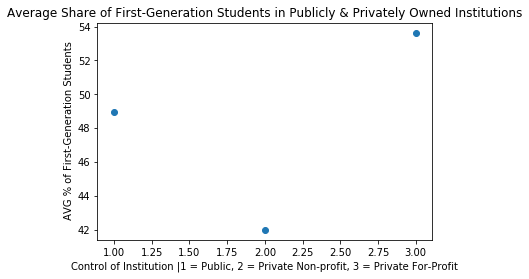

In [191]:
plt.scatter(x,y*100)
plt.title("Average Share of First-Generation Students in Publicly & Privately Owned Institutions")
plt.xlabel("Control of Institution |1 = Public, 2 = Private Non-profit, 3 = Private For-Profit")
plt.ylabel(" AVG % of First-Generation Students")